In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import r2_score

In [56]:
diabetes = datasets.load_diabetes()

In [57]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print("First 5 rows of dataset\n", df.head())

First 5 rows of dataset
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [58]:
def BmiModel():
  new_bmi = float(input("Enter BMI: "))
  prediction = model.predict(np.array([[new_bmi]]))
  print(f"\nPredicted diabetes Progession for BMI={new_bmi}: {prediction[0]:.2f}")

In [59]:
BmiModel()

Enter BMI: 5.2

Predicted diabetes Progession for BMI=5.2: 5344.61


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
x = df[['bmi']]
y = df['target']


In [61]:
x_train, x_test, y_train, y_test =train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [62]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(x_test)


In [64]:
r2 = r2_score(y_test, y_pred)
print(f"Model R-squared: {r2:.2f}")

Model R-squared: 0.23


In [65]:
new_bmi = 0.05
# Wrap new_bmi in a DataFrame to provide feature names, aligning with model training
prediction = model.predict(pd.DataFrame([[new_bmi]], columns=['bmi']))
# Access the first element of the prediction array before converting to float
prediction = float(prediction[0])
print(f"\nPredicted diabetes Progession for BMI={new_bmi}: {prediction:.2f}")


Predicted diabetes Progession for BMI=0.05: 201.93


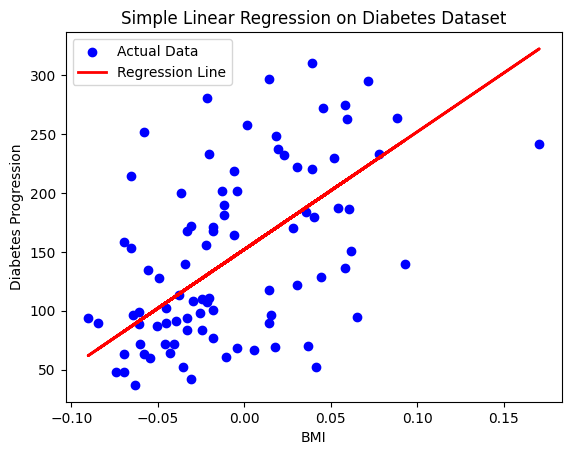

In [72]:
# Step 9: Visualization
plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Simple Linear Regression on Diabetes Dataset')
plt.legend()

In [73]:
import pickle

# Assuming 'model' is your trained LinearRegression model
filename = 'linear_regression_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {filename} using pickle.")

Model saved as linear_regression_model.pkl using pickle.
